# Web scraping Le Wagon cities

## Importing libraries for web scraping

In [1]:
import requests
from bs4 import BeautifulSoup

## Getting the url of the Le Wagon's website

In [2]:
url = "https://www.lewagon.com/campuses"

## Requesting the url of the website using **requests** library

In [3]:
response = requests.get(url)

In [4]:
print(response)

<Response [200]>


## Getting response's status code

In [5]:
response.status_code

200

## Looking at the response's content

In [6]:
response.content

b'<!DOCTYPE html>\n<html class="pages-campuses" lang="en">\n  <head>\n    <title>Our 37 Campuses | Le Wagon</title>\n    <meta name="description" content="Paris, London, Berlin, Montreal, Shanghai, Bali, S\xc3\xa3o Paulo... Discover Le Wagon&#39;s 37 campuses all over the world.">\n\n    <meta http-equiv="content-type" content="text/html; charset=utf-8" />\n    <meta name="robots" content="index, follow">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n    <link rel="icon" href="https://dwj199mwkel52.cloudfront.net/assets/favicon-2c2100c8c497758008b4271b2be66d5a2182ad8acfdcdde48996dc357e14df54.png" type="image/png" />\n    <link rel="apple-touch-icon" href="https://dwj199mwkel52.cloudfront.net/assets/apple-touch-icon-c29632e03ea4a63a00e432568fe5fc980798a847d1dbccaaa4d04d5634e11f4e.png" />\n\n    <meta property="og:site_name" content="Coding Bootcamp Le Wagon | World&#39;s Best Coding Boot

## Creating soup with BeautifulSoup

In [7]:
soup = BeautifulSoup(response.content, 'html.parser')

In [8]:
soup

<!DOCTYPE html>

<html class="pages-campuses" lang="en">
<head>
<title>Our 37 Campuses | Le Wagon</title>
<meta content="Paris, London, Berlin, Montreal, Shanghai, Bali, São Paulo... Discover Le Wagon's 37 campuses all over the world." name="description"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type">
<meta content="index, follow" name="robots"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://dwj199mwkel52.cloudfront.net/assets/favicon-2c2100c8c497758008b4271b2be66d5a2182ad8acfdcdde48996dc357e14df54.png" rel="icon" type="image/png"/>
<link href="https://dwj199mwkel52.cloudfront.net/assets/apple-touch-icon-c29632e03ea4a63a00e432568fe5fc980798a847d1dbccaaa4d04d5634e11f4e.png" rel="apple-touch-icon"/>
<meta content="Coding Bootcamp Le Wagon | World's Best Coding Bootcamp" property="og:site_name">
<meta content="Our 37 Campuses | Le Wagon" property="og:title">
<m

## Getting all the cities based on the class name

In [9]:
cities = soup.find_all(class_='city-card')

In [10]:
print(cities)

[<div class="city-card">
<div class="city-card-cover" style="      background-image: url(https://res.cloudinary.com/wagon/image/upload/c_fill,h_320,q_auto,w_540/v1541765086/xnq7sxknj6mcu2skxxiq.jpg);
      background-image: -webkit-image-set(url(https://res.cloudinary.com/wagon/image/upload/c_fill,h_320,q_auto,w_540/v1541765086/xnq7sxknj6mcu2skxxiq.jpg) 1x, url(https://res.cloudinary.com/wagon/image/upload/c_fill,h_640,q_auto,w_1080/v1541765086/xnq7sxknj6mcu2skxxiq.jpg) 2x);
"></div>
<div class="city-card-content">
<div class="city-card-info">
<h3>Tel Aviv</h3>
<span>Dec 20, 2019</span>
</div>
<p>
              Course in English
            </p>
</div>
</div>, <div class="city-card">
<div class="city-card-cover" style="      background-image: url(https://res.cloudinary.com/wagon/image/upload/c_fill,h_320,q_auto,w_540/v1540215989/hlo1wgs9ld7owxuvedgk.jpg);
      background-image: -webkit-image-set(url(https://res.cloudinary.com/wagon/image/upload/c_fill,h_320,q_auto,w_540/v1540215989/hl

## getting information from the first city

In [11]:
first_city = cities[0]
first_city

<div class="city-card">
<div class="city-card-cover" style="      background-image: url(https://res.cloudinary.com/wagon/image/upload/c_fill,h_320,q_auto,w_540/v1541765086/xnq7sxknj6mcu2skxxiq.jpg);
      background-image: -webkit-image-set(url(https://res.cloudinary.com/wagon/image/upload/c_fill,h_320,q_auto,w_540/v1541765086/xnq7sxknj6mcu2skxxiq.jpg) 1x, url(https://res.cloudinary.com/wagon/image/upload/c_fill,h_640,q_auto,w_1080/v1541765086/xnq7sxknj6mcu2skxxiq.jpg) 2x);
"></div>
<div class="city-card-content">
<div class="city-card-info">
<h3>Tel Aviv</h3>
<span>Dec 20, 2019</span>
</div>
<p>
              Course in English
            </p>
</div>
</div>

## Getting different information from the city

In [12]:
city_name = first_city.find(class_='city-card-info').find('h3').string
city_language = first_city.find(class_='city-card-content').find('p').string.strip().strip('Course in ')
print(city_language)

English


## Looping over all cities

In [13]:
cities_dict = {
    'names': [],
    'languages': []
}

for city in cities:
    city_name = city.find(class_='city-card-info').find('h3').string
    city_language = city.find(class_='city-card-content').find('p').string.strip().strip('Course in ')
    cities_dict['names'].append(city_name)
    cities_dict['languages'].append(city_language)
cities_dict

{'names': ['Tel Aviv',
  'Bordeaux',
  'Copenhagen',
  'Lausanne',
  'Oslo',
  'Paris',
  'Belo Horizonte',
  'Mexico',
  'Rio de Janeiro',
  'São Paulo',
  'Amsterdam',
  'Berlin',
  'Brussels',
  'Buenos Aires',
  'Lisbon',
  'London',
  'Lyon',
  'Madrid',
  'Melbourne',
  'Montreal',
  'Rome',
  'Seoul',
  'Tokyo',
  'Nantes',
  'Bali',
  'Marseille',
  'Barcelona',
  'Singapore',
  'Stockholm',
  'Shanghai',
  'Milan',
  'Rennes',
  'Chengdu',
  'Lille',
  'Shenzhen',
  'Casablanca',
  'Kyoto'],
 'languages': ['English',
  'French',
  'English',
  'French',
  'English',
  'French',
  'Portug',
  'English',
  'English',
  'Portug',
  'English',
  'English',
  'English',
  'English, Spanish',
  'English',
  'English',
  'French',
  'English',
  'English',
  'English',
  'English',
  'English',
  'English',
  'French',
  'English',
  'French',
  'English',
  'English',
  'English',
  'English',
  'English',
  'French',
  'English',
  'French',
  'English, Ch',
  'English',
  'English

In [18]:
import pandas as pd
cities_df = pd.DataFrame(cities_dict)
cities_df

names         languages
0         Tel Aviv           English
1         Bordeaux            French
2       Copenhagen           English
3         Lausanne            French
4             Oslo           English
5            Paris            French
6   Belo Horizonte            Portug
7           Mexico           English
8   Rio de Janeiro           English
9        São Paulo            Portug
10       Amsterdam           English
11          Berlin           English
12        Brussels           English
13    Buenos Aires  English, Spanish
14          Lisbon           English
15          London           English
16            Lyon            French
17          Madrid           English
18       Melbourne           English
19        Montreal           English
20            Rome           English
21           Seoul           English
22           Tokyo           English
23          Nantes            French
24            Bali           English
25       Marseille            French
26       Barcelona           English
27       Singapore           English
28       Stockholm           English
29        Shanghai           English
30           Milan           English
31          Rennes            French
32         Chengdu           English
33           Lille            French
34        Shenzhen       English, Ch
35      Casablanca           English
36           Kyoto           English

In [17]:
import matplotlib
%matplotlib inline

In [19]:
group_by_languages = cities_df.groupby('languages').count()
group_by_languages

names
languages              
English              25
English, Ch           1
English, Spanish      1
French                8
Portug                2

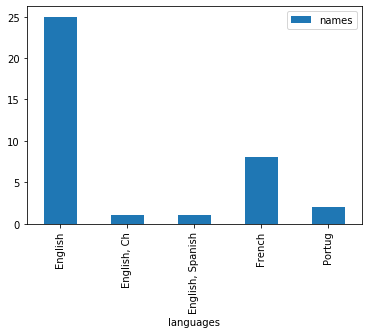

In [22]:
group_by_languages.plot(kind="bar")